#             $$\text{Gnu Radio Companion with Machine Learning} $$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams["font.size"] = 24
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

plt.style.use("fivethirtyeight")

In [2]:
shaped_clear = (np.fromfile(open("D:\Python\AICT\data\Clear\CLEAR.bin"), dtype=np.complex64))[:5000000]

In [10]:
wifi_shape = np.fromfile(open("D:\Python\AICT\data\WIFI_FLOOD\WIFI_FLOOD.bin"), dtype=np.complex64)[:5000000]

In [11]:
lte_shape = np.fromfile(open("D:\Python\AICT\data\LTE_1flood\LTE_1M.bin"),dtype= np.complex64)[:5000000]

In [5]:
# noise[:5000000].shape  # 50 MI
# shaped = noise[:5000000]
# wifi_shape = wifi_flood[:5000000]
# lte_shape = lte_flood[:5000000]


In [54]:
from Lib.data_signal import signal, concat_3
Wifi = (signal(data=wifi_shape,slice = 100000, sinal = 'Wifi',id = 'Wifi'))
Wifi.info()
Wifi.to_pandas()
Wifi.database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype    
---  ------  --------------   -----    
 0   0       100000 non-null  complex64
dtypes: complex64(1)
memory usage: 781.4 KB
None


,Wifi_Real,Wifi_Imag,ID
0,0.004425,0.006348,Wifi
1,0.005676,0.006348,Wifi
2,0.006317,0.007904,Wifi
3,0.006562,0.008515,Wifi
4,0.006745,0.009980,Wifi
...,...,...,...
99995,-0.000763,-0.007904,Wifi
99996,-0.000916,-0.007965,Wifi
99997,-0.001160,-0.007904,Wifi
99998,-0.000824,-0.007996,Wifi


In [55]:
Clear = (signal(data=shaped_clear,slice = 100000, sinal = 'Clear', id = 'Clear'))
Clear.info()
Clear.to_pandas()
Clear.database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype    
---  ------  --------------   -----    
 0   0       100000 non-null  complex64
dtypes: complex64(1)
memory usage: 781.4 KB
None


,Clear_Real,Clear_Imag,ID
0,0.000153,-0.000031,Clear
1,0.000061,-0.000244,Clear
2,0.000000,0.000000,Clear
3,0.000183,0.000000,Clear
4,0.000214,-0.000061,Clear
...,...,...,...
99995,-0.007477,-0.010804,Clear
99996,-0.007630,-0.011200,Clear
99997,-0.007355,-0.011292,Clear
99998,-0.007324,-0.011292,Clear


In [53]:
LTE = (signal(data=lte_shape,slice = 100000, sinal = 'LTE', id='LTE'))
LTE.info()
LTE.to_pandas()
LTE.database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype    
---  ------  --------------   -----    
 0   0       100000 non-null  complex64
dtypes: complex64(1)
memory usage: 781.4 KB
None


,LTE_Real,LTE_Imag,ID
0,0.000244,0.000122,LTE
1,0.000153,-0.000153,LTE
2,-0.000153,-0.000153,LTE
3,0.000000,0.000336,LTE
4,0.000275,0.000305,LTE
...,...,...,...
99995,-0.000244,-0.007416,LTE
99996,-0.000244,-0.007477,LTE
99997,-0.000244,-0.007324,LTE
99998,-0.000458,-0.007233,LTE


In [56]:
uniao = concat_3(database1= Clear.database, database2=Wifi.database,database3=LTE.database ,sinal1 ='Clear',sinal2 = 'Wifi',sinal3 = 'LTE')
uniao.merge()
uniao.concat = uniao.concat.reset_index().rename(columns={'level_0':'Signals','level_1':'index'}).drop(columns=['index'])
df = uniao.concat
df.info()
df

Concatenação efetuada
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype          
---  ------   --------------   -----          
 0   Signals  300000 non-null  object         
 1   Real     300000 non-null  float32        
 2   Imag     300000 non-null  double[pyarrow]
 3   ID       300000 non-null  object         
dtypes: double[pyarrow](1), float32(1), object(2)
memory usage: 8.0+ MB


,Signals,Real,Imag,ID
0,Clear,0.000153,-0.000031,Clear
1,Clear,0.000061,-0.000244,Clear
2,Clear,0.000000,0.000000,Clear
3,Clear,0.000183,0.000000,Clear
4,Clear,0.000214,-0.000061,Clear
...,...,...,...,...
299995,LTE,-0.000244,-0.007416,LTE
299996,LTE,-0.000244,-0.007477,LTE
299997,LTE,-0.000244,-0.007324,LTE
299998,LTE,-0.000458,-0.007233,LTE


In [57]:
from Lib.TrainTestSplit import TrainTestSplit 
spliter = TrainTestSplit(data = df)
# Acessando os conjuntos de treinamento e teste
X_train, X_test, y_train, y_test =spliter.train_test_split( test_size=0.2, random_state=20)

print("x_train:", X_train)
print("y_train:", X_test)
print("x_test:", y_train)
print("y_test:", y_test)


x_train:             Real      Imag
27033  -0.015351 -0.022706
138243 -0.001709 -0.014588
181028 -0.001343 -0.009644
244568 -0.000336 -0.012757
75506  -0.009522 -0.013978
...          ...       ...
178569 -0.001343 -0.009858
31962  -0.014863 -0.021821
220060 -0.001038 -0.015900
285919 -0.000214 -0.008484
37135  -0.014069 -0.020478

[240000 rows x 2 columns]
y_train:             Real      Imag
178444 -0.001190 -0.009796
242913 -0.000580 -0.012970
112835 -0.002441 -0.018525
236080 -0.000641 -0.013825
79407  -0.009705 -0.013459
...          ...       ...
185206 -0.001373 -0.009491
101357 -0.005493 -0.023896
162824 -0.001312 -0.011353
212747 -0.000946 -0.016999
125656 -0.002228 -0.016358

[60000 rows x 2 columns]
x_test: 27033     Clear
138243     Wifi
181028     Wifi
244568      LTE
75506     Clear
          ...  
178569     Wifi
31962     Clear
220060      LTE
285919      LTE
37135     Clear
Name: ID, Length: 240000, dtype: object
y_test: 178444     Wifi
242913      LTE
112835     Wifi
2

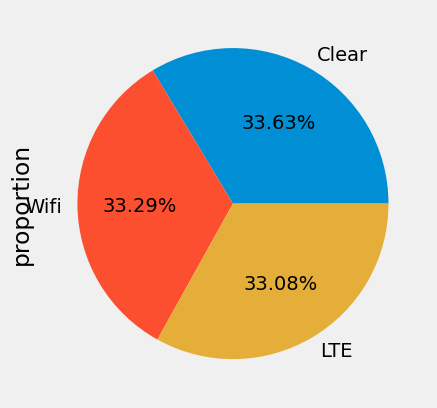

In [58]:
# Criando um objeto Visualization
from Lib.Views import Visualization
vis = Visualization()

# Plotando o gráfico de pizza
vis.plot_pie(y_test) # Distruição de X_train

In [59]:
from Lib.Normalizing import Normalizing
normalized = Normalizing(X_train=X_train, X_test= X_test)
print(f"""\n normalized.X_test: {normalized.X_test}
normalized.X_train {normalized.X_train}""")


 normalized.X_test: [[0.3730843  0.29779131]
 [0.38266284 0.25818736]
 [0.35344828 0.18888043]
 ...
 [0.37116859 0.27837014]
 [0.37691572 0.20792079]
 [0.35680078 0.21591775]]
normalized.X_train [[0.29672522 0.26052298]
 [0.4752396  0.3453444 ]
 [0.48003193 0.39700257]
 ...
 [0.48402554 0.33163267]
 [0.49480829 0.40911991]
 [0.31349839 0.28380104]]


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 7,weights='distance', p=2)
knn_fit = knn.fit(normalized.X_train ,y_train)
model = knn_fit
model

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [175]:
from Lib.metrics import metrics
metrics = metrics(model = knn.fit(normalized.X_train ,y_train),
X_train =normalized.X_train,X_test = normalized.X_test, y_train=y_train ,y_test=y_test)

metrics.table()

,Score,Accuracy,F1-Score,Recall
0,0.391483,0.391483,0.301506,0.391483


In [89]:
metrics.predict

array(['Clear', 'Clear', 'Clear', ..., 'LTE', 'Wifi', 'Clear'],
      dtype=object)

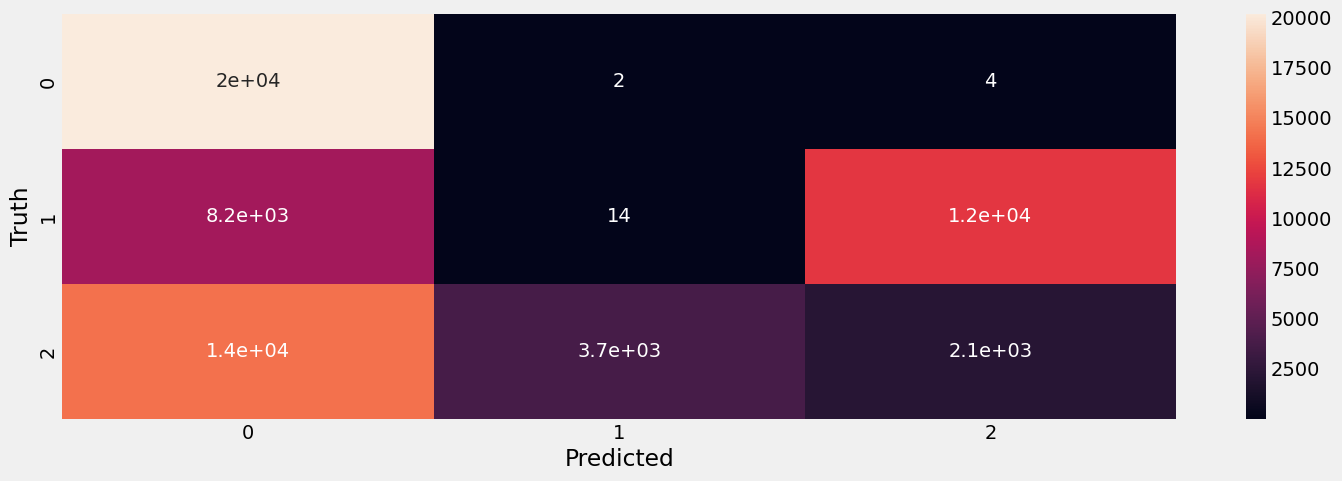

In [113]:
from Lib.Views import Visualization ,RandomizedSearchCVWrapper
confusion = Visualization()
confusion_matrix = confusion.confusion_matrix(model=model,X_train =normalized.X_train,
X_test= normalized.X_test, y_train= y_train, y_test= y_test)

In [91]:
metrics.confusion_matrix()

array([[20172,     2,     4],
       [ 8168,    14, 11665],
       [14151,  3708,  2116]], dtype=int64)

In [92]:
metrics.report()

              precision    recall  f1-score   support

       Clear       0.47      1.00      0.64     20178
         LTE       0.00      0.00      0.00     19847
        Wifi       0.15      0.11      0.13     19975

    accuracy                           0.37     60000
   macro avg       0.21      0.37      0.26     60000
weighted avg       0.21      0.37      0.26     60000



In [147]:

import category_encoders as ce
encoder = ce.ordinal.OrdinalEncoder()

parameters = {'n_neighbors': range(1,12,1),
                         'weights': ['uniform', 'distance'], 'p':[1,2]
             }
n_iter=8
cv=3
scoring='neg_mean_squared_error' 
random_state=20
return_train_score=True
n_jobs = -1
verbose = 0
knn = KNeighborsClassifier()

random_model = RandomizedSearchCVWrapper(model= knn, param_distributions =parameters , X_train = normalized.X_train, 
y_train= encoder.fit_transform(y_train), n_iter= n_iter, cv=cv,random_state=random_state,
return_train_score =return_train_score, scoring= scoring, n_jobs = n_jobs, verbose = verbose )


In [148]:
random_model.__dict__

{'model': KNeighborsClassifier(),
 'param_distributions': {'n_neighbors': range(1, 12),
  'weights': ['uniform', 'distance'],
  'p': [1, 2]},
 'n_iter': 8,
 'cv': 3,
 'random_state': 20,
 'n_jobs': -1,
 'scoring': 'neg_mean_squared_error',
 'verbose': 0,
 'return_train_score': True,
 'randomsearch': RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=8, n_jobs=-1,
                    param_distributions={'n_neighbors': range(1, 12),
                                         'p': [1, 2],
                                         'weights': ['uniform', 'distance']},
                    random_state=20, return_train_score=True,
                    scoring='neg_mean_squared_error'),
 'results':    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_weights   
 5       0.395246      0.088350         6.444125        0.671740       uniform  \
 3       0.287431      0.003242         4.751863        0.248359       uniform   
 6       0.334070      0.020703         5.8

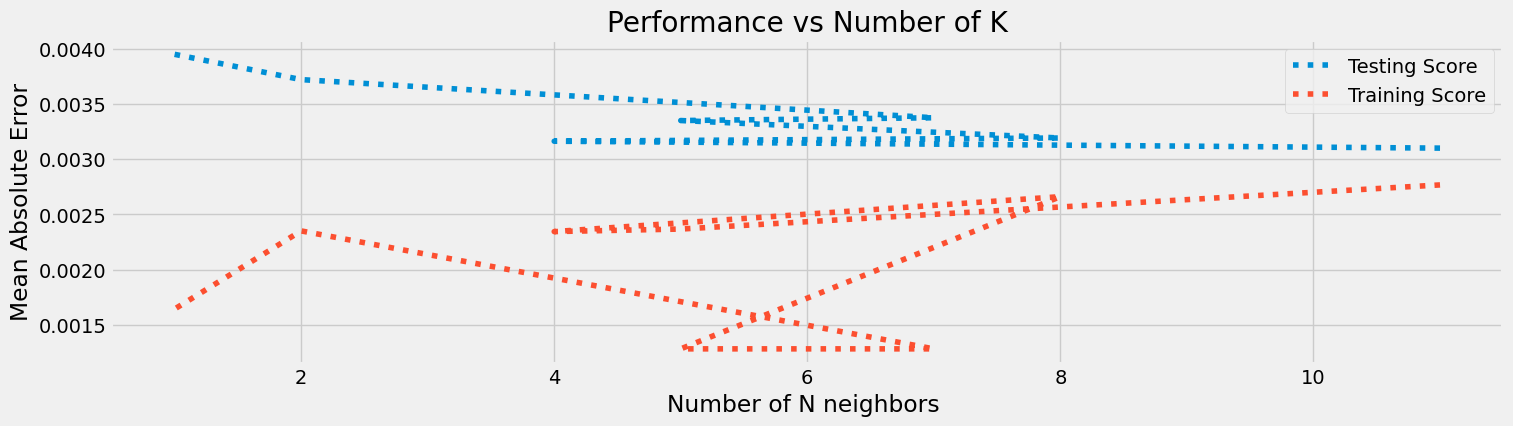

In [150]:
random_model.plot_mean_performance()

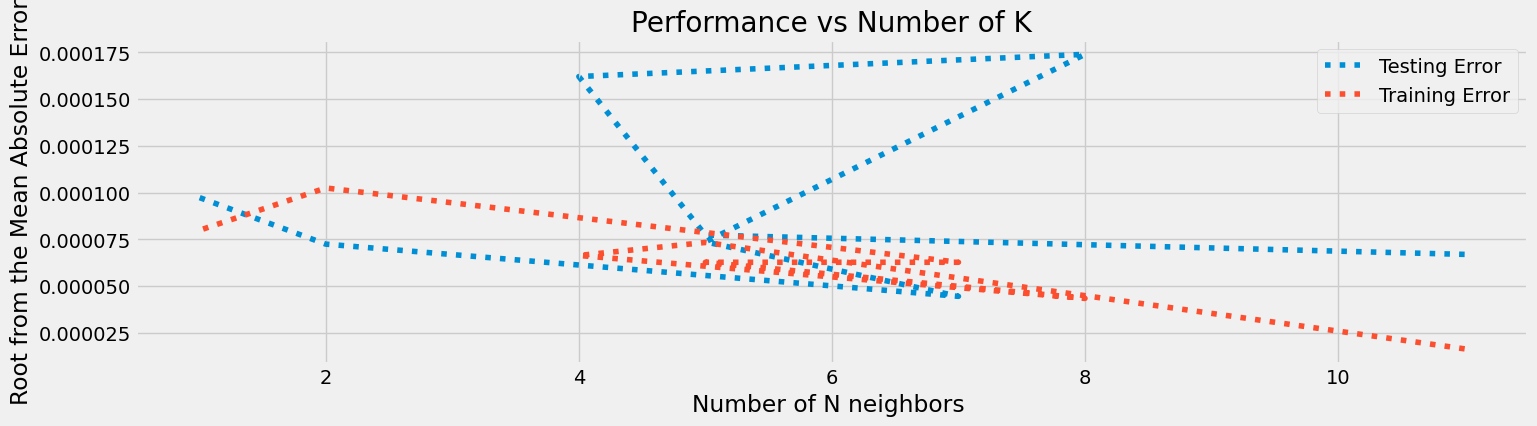

In [151]:
random_model.plot_std_performance()

In [172]:
random_model.results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
5,0.395246,0.088350,6.444125,0.671740,uniform,1,11,"{'weights': 'uniform', 'p': 1, 'n_neighbors': 11}",-0.003087,-0.003187,-0.003025,-0.003100,0.000067,1,-0.002744,-0.002775,-0.002781,-0.002767,0.000016
3,0.287431,0.003242,4.751863,0.248359,uniform,2,5,"{'weights': 'uniform', 'p': 2, 'n_neighbors': 5}",-0.003112,-0.003263,-0.003087,-0.003154,0.000077,2,-0.002469,-0.002300,-0.002331,-0.002367,0.000073
6,0.334070,0.020703,5.822894,0.555170,uniform,2,4,"{'weights': 'uniform', 'p': 2, 'n_neighbors': 4}",-0.003087,-0.003387,-0.003012,-0.003162,0.000162,3,-0.002425,-0.002344,-0.002263,-0.002344,0.000066
0,0.411119,0.041635,4.542124,0.326540,uniform,2,8,"{'weights': 'uniform', 'p': 2, 'n_neighbors': 8}",-0.003063,-0.003438,-0.003075,-0.003192,0.000174,4,-0.002713,-0.002606,-0.002662,-0.002660,0.000043
7,0.359908,0.038412,1.009443,0.020435,distance,1,5,"{'weights': 'distance', 'p': 1, 'n_neighbors': 5}",-0.003375,-0.003250,-0.003425,-0.003350,0.000074,5,-0.001313,-0.001194,-0.001337,-0.001281,0.000063


In [124]:
random_model.randomsearch

RandomizedSearchCV(cv=2,
                   estimator=KNeighborsClassifier(n_neighbors=7,
                                                  weights='distance'),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'n_neighbors': range(1, 8), 'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=40, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [177]:
from Lib.metrics import metrics

metrics_random = metrics(model = random_model.randomsearch.fit(normalized.X_train ,y_train),
X_train =normalized.X_train,X_test = normalized.X_test, y_train=y_train ,y_test=y_test)

In [179]:
metrics_random.report()

              precision    recall  f1-score   support

       Clear       0.55      1.00      0.71     20178
         LTE       0.30      0.00      0.00     19847
        Wifi       0.28      0.33      0.30     19975

    accuracy                           0.45     60000
   macro avg       0.38      0.44      0.34     60000
weighted avg       0.38      0.45      0.34     60000



In [181]:
metrics_random.confusion_matrix()

array([[20172,     2,     4],
       [ 2835,     3, 17009],
       [13375,     5,  6595]], dtype=int64)